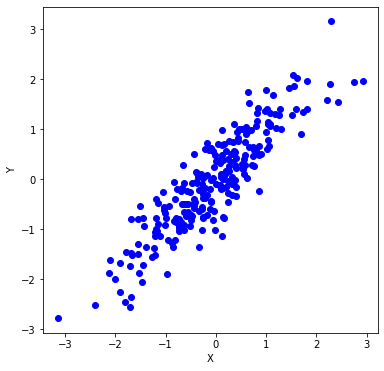

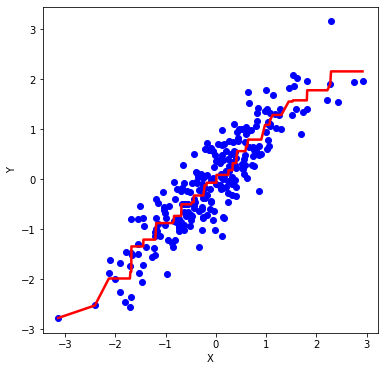

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def PAV(X, Y, FUN=np.mean, left=True, ordered=False, **kwargs):
    n = len(Y)
    assert n > 1 and n == len(X) and not np.any(np.isnan(np.concatenate((X, Y)))), "Invalid input parameters"

    if not ordered:
        order = np.argsort(X)
        Y = Y[order]
        X = X[order]

    Y_hat = Y.copy()
    work_index = np.arange(1, n+1)

    if left:
        main_index = np.arange(0, n-1)
        while True:
            increasing = np.diff(Y_hat) < 0
            if not np.any(increasing):
                break
            else:
                i = min(main_index[increasing])
                i_and_ii = np.isin(work_index, work_index[i:i+2])
                Y_hat[i_and_ii] = FUN(Y_hat[i_and_ii], **kwargs)
                work_index[i_and_ii] = work_index[i]
    else:
        main_index = np.arange(1, n)
        while True:
            decreasing = np.diff(Y_hat) < 0
            if not np.any(decreasing):
                break
            else:
                i = max(main_index[decreasing])
                i_and_ii = np.isin(work_index, work_index[i-1:i+1])
                Y_hat[i_and_ii] = FUN(Y_hat[i_and_ii], **kwargs)
                work_index[i_and_ii] = work_index[i]

    return {'Y_hat': Y_hat, 'Y': Y, 'X': X}


# Sample data from a bivariate t-distribution with df = 4
np.random.seed(1)
copula = np.random.multivariate_normal([0, 0], [[1, 0.9], [0.9, 1]], 250)
Data = np.array(copula)

result = PAV(Data[:, 0], Data[:, 1], np.mean)

# Scatterplot of simulated data
plt.figure(figsize=(6, 6))
plt.scatter(Data[:, 0], Data[:, 1], marker='o',c = 'blue', label='Simulated Data')
plt.xlabel('X')
plt.ylabel('Y')
#plt.legend()
#plt.grid()
plt.savefig("logo_1.png",transparent =  True)
plt.show()

# Scatterplot of simulated data together with regression line
plt.figure(figsize=(6, 6))
plt.scatter(result['X'], result['Y'], marker='o',c = 'blue', label='PAV Result')
plt.plot(result['X'], result['Y_hat'], color='red', linewidth=2.5, label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
#plt.legend()
#plt.grid()
plt.savefig("logo_2.png",transparent =  True)
plt.show()
